<center><img src="Fig/Ensimag.png" width="30%" height="30%"></center>
<center><h3>Ensimag - 3A - IF</h3></center>
<hr>
<center><h1>Traitement des données hétérogènes</h1></center>
<center><h2>TP: Système de recommandation de films</h2></center>
<center><h3>Daniella Teukeng Mobou, Mylène Le Calvez</h3></center>
<center><h6>Date de rendu : 01/03/2019</h6></center>

<hr>
# 0) Prétraitement

## a) Scinder la base en deux parties : *Train* et *Test*

explications partie 0.a


In [2]:
# importing pandas module
import pandas as pd

In [3]:
#lecture des fichiers
df = pd.read_csv("ratings.dat",
                 sep="::", #separateur
                 header=None, #pas d'en-tête
                 engine='python')
 #df[colonne][ligne]
 #df[0] colonne user, df[1] colonne id film, df[2] colonne rate, df[3] colonne timestamp

In [4]:
#creation des dataframes
data_training = pd.DataFrame()
data_test = pd.DataFrame()
#creation du dictionnaire {utilisateurs:nb notes}
user_nbRating = {}

In [5]:
##Remplissage d'un dictionnaire {utilisateurs:nb notes}
#le numéro de l'utilisateur
currentUser = 1
#le nombre de film qu'il a aimé
ratingUser = 0
line = 0
while line < len(df) and df[0][line] == currentUser:
    ratingUser += 1
    line += 1
    if line < len(df) and df[0][line] != currentUser:
        user_nbRating[currentUser] = ratingUser
        ratingUser = 0
        currentUser = df[0][line]
#Pour le dernier utilisateur
user_nbRating[currentUser] = ratingUser

In [6]:
##Remplissage des dataframe test et apprentissage
ligne = 0
for user_id in user_nbRating:
    data_training_user = pd.DataFrame()
    data_test_user = pd.DataFrame()
    index = int(0.7 * user_nbRating[user_id])
    data_training_user = df.loc[ligne:index+ligne-1,]
    data_test_user = df.loc[index + ligne : ligne + user_nbRating[user_id],]
    data_training = pd.concat([data_training, data_training_user])
    data_test = pd.concat([data_test, data_test_user])
    ligne = ligne + user_nbRating[user_id]

In [7]:
##Creation de fichiers contenant les données test et apprentissage
data_training.to_csv('data_training.dat', sep=':',header=None, index = False)
data_test.to_csv('data_test.dat', sep=':',header=None, index = False)

## b) Calculer les statistiques 

In [8]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

### Distribution des notes en *train*

explications

In [9]:
df = pd.read_csv("data_training.dat",
                 sep=":", #separator whitespace
                 header=None, #none header
                 engine='python')

In [10]:
Note = df[2]
Note = np.sort(Note)

In [50]:
print("Taille de l'échantillon :", len(Note))
print("Note moyenne :", np.mean(Note))
print("Note médiane :", np.median(Note))
print("Note maximale :", max(Note))
print("Note minimale :", min(Note))
print("Quartile 25% :", stats.scoreatpercentile(Note, 25))
print("Quartile 75% :", stats.scoreatpercentile(Note, 75))
print("L'écart type :", np.std(Note))
print("L'écart type non biasé :", np.std(Note, ddof=1))

Taille de l'échantillon : 308870
Note moyenne : 3.59898662868
Note médiane : 4.0
Note maximale : 5
Note minimale : 1
Quartile 25% : 3.0
Quartile 75% : 4.0
L'écart type : 1.11690344929
L'écart type non biasé : 1.11690525734


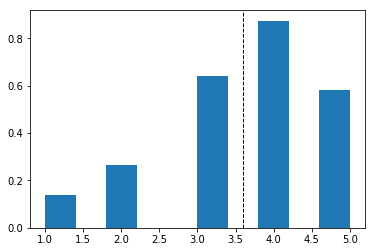

In [45]:
plt.hist(Note,normed=1)
plt.axvline(Note.mean(), color='k', linestyle='dashed', linewidth=1)
plt.show()

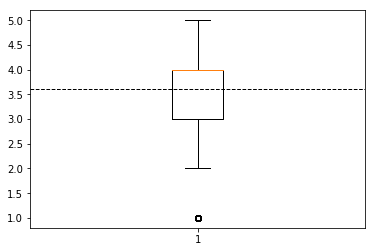

In [47]:
fig = plt.figure()
plt.xticks([0], ['Note'])
plt.axhline(Note.mean(), color='k', linestyle='dashed', linewidth=1)
plt.boxplot(Note)
plt.savefig('BoxPlot.png', bbox_inches='tight')
plt.show()

### Distribution des notes en *test*

In [14]:
df = pd.read_csv("data_test.dat",
                 sep=":", #separator whitespace
                 header=None, #none header
                 engine='python')

In [15]:
Note = df[2]
Note = np.sort(Note)

In [49]:
print("Taille de l'échantillon :", len(Note))
print("Note moyenne :", np.mean(Note))
print("Note médiane :", np.median(Note))
print("Note maximale :", max(Note))
print("Note minimale :", min(Note))
print("Quartile 25% :", stats.scoreatpercentile(Note, 25))
print("Quartile 75% :", stats.scoreatpercentile(Note, 75))
print("L'écart type :", np.std(Note))
print("L'écart type non biasé :", np.std(Note, ddof=1))

Taille de l'échantillon : 308870
Note moyenne : 3.59898662868
Note médiane : 4.0
Note maximale : 5
Note minimale : 1
Quartile 25% : 3.0
Quartile 75% : 4.0
L'écart type : 1.11690344929
L'écart type non biasé : 1.11690525734


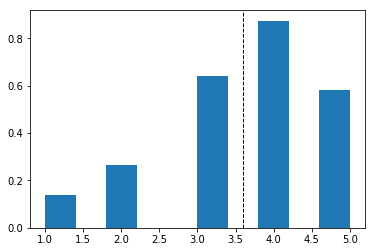

In [41]:
plt.hist(Note,normed=1)
plt.axvline(Note.mean(), color='k', linestyle='dashed', linewidth=1)
plt.show()

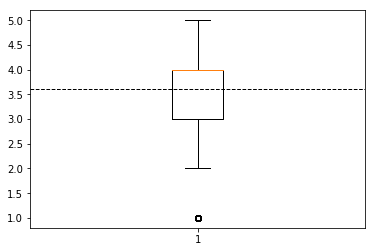

In [46]:
fig = plt.figure()
plt.xticks([0], ['Note'])
plt.axhline(Note.mean(), color='k', linestyle='dashed', linewidth=1)
plt.boxplot(Note)
plt.savefig('BoxPlot.png', bbox_inches='tight')
plt.show()

### Distribution des interactions

In [25]:
Interactions = [user_nbRating[user_id] for user_id in user_nbRating]

In [26]:
Interactions = np.sort(Interactions)

In [51]:
print("Taille de l'échantillon :", len(Interactions))
print("Nombre d'interaction moyen :", np.mean(Interactions))
print("Nombre d'interaction médian :", np.median(Interactions))
print("Nombre d'interaction maximal :", max(Interactions))
print("Nombre d'interaction minimal :", min(Interactions))
print("Quartile 25% :", stats.scoreatpercentile(Interactions, 25))
print("Quartile 75% :", stats.scoreatpercentile(Interactions, 75))
print("L'écart type :", np.std(Interactions))
print("L'écart type non biasé :", np.std(Interactions, ddof=1))

Taille de l'échantillon : 6040
Nombre d'interaction moyen : 165.597516556
Nombre d'interaction médian : 96.0
Nombre d'interaction maximal : 2314
Nombre d'interaction minimal : 20
Quartile 25% : 44.0
Quartile 75% : 208.0
L'écart type : 192.731072529
L'écart type non biasé : 192.74702907


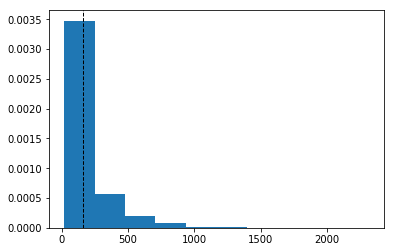

In [44]:
plt.hist(Interactions,normed=1)
plt.axvline(Interactions.mean(), color='k', linestyle='dashed', linewidth=1)
plt.show()

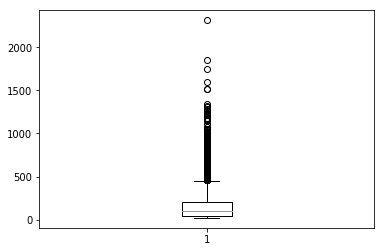

In [32]:
fig = plt.figure()
plt.xticks([0], ['Interactions'])
plt.boxplot(Interactions)
plt.savefig('BoxPlot.png', bbox_inches='tight')
plt.show()

<hr>
# 1) Phase d'apprentissage

## a) Présentation

## b) Algorithme de descente de gradient 

<hr>
# 2) Phase de test

## a) Mean Square Error

## b) Mean Absolute Error 

## c) Synthèse 
